<a href="https://colab.research.google.com/github/Ravikiranparanji/Adv-math-statistics/blob/main/college_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Load the data set

In [206]:
data = pd.read_excel("Preliminary college year.xlsx")
data.head(10)

,High School GPA,SAT Score,Federal Ethnic Group,Gender,"Pell Grant Eligible? (1=yes, 0=no)","Attended Orientation? (1=yes, 0=no)","Attended Experience Day? (1=yes, 0=no)","Resident/Commuter (1=resident, 0=commuter)","Athlete? (1=yes, 0=no)","Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)",...,Number of Peer Mentor Meetings Attended,Number of Workshops Attended,F17 GPA,S18 GPA,CUM GPA,Number of Credits Earned,"Completed Connect? (1=yes, 0=no)",Reason for not Completing Connect,"Retained F17-F18? (1=yes, 0=no)",Reason not Retained
0,2.595,970.0,White,F,0.0,1.0,0.0,1.0,1.0,2.0,...,2.0,2.0,0.660,2.200,1.788,18.0,0.0,academic dismissal after S18 semester,0.0,academic dismissal after S18 semester
1,2.637,1020.0,White,F,0.0,1.0,0.0,1.0,1.0,2.0,...,1.0,2.0,1.567,1.660,1.625,18.0,0.0,academic dismissal after S18 semester,0.0,academic dismissal after S18 semester
2,2.803,930.0,Black/African American,F,1.0,1.0,1.0,1.0,0.0,1.0,...,2.0,3.0,2.425,2.250,2.338,24.0,1.0,NaN,0.0,financial
3,2.354,1080.0,Hispanic/Latino,M,0.0,1.0,1.0,1.0,0.0,1.0,...,2.0,0.0,0.925,NaN,NaN,6.0,0.0,academic dismissal after F17 semester,0.0,academic dismissal after F17 semester
4,2.850,880.0,White,F,1.0,1.0,1.0,0.0,0.0,2.0,...,3.0,3.0,3.200,1.680,2.250,18.0,1.0,NaN,1.0,NaN
5,2.763,940.0,Black/African American,F,1.0,1.0,1.0,1.0,0.0,2.0,...,3.0,5.0,3.000,3.244,3.126,31.0,1.0,NaN,1.0,NaN
6,2.690,1000.0,Hispanic/Latino,M,1.0,1.0,0.0,1.0,0.0,2.0,...,1.0,1.0,1.400,NaN,NaN,6.0,0.0,financial,0.0,financial
7,2.422,NaN,Black/African American,F,1.0,1.0,1.0,1.0,0.0,1.0,...,6.0,2.0,2.925,0.800,2.014,18.0,0.0,personal,1.0,NaN
8,2.881,960.0,Black/African American,M,1.0,1.0,1.0,0.0,0.0,2.0,...,3.0,3.0,3.900,3.750,3.814,21.0,1.0,NaN,1.0,NaN
9,2.594,NaN,Hispanic/Latino,M,1.0,1.0,1.0,1.0,1.0,2.0,...,5.0,3.0,3.080,3.140,3.110,30.0,1.0,NaN,1.0,NaN


Shaping the data

In [207]:
data.shape

(108, 33)

Checking for missing values

In [208]:
data.isnull().sum()

High School GPA                                                                               2
SAT Score                                                                                     6
Federal Ethnic Group                                                                          2
Gender                                                                                        2
Pell Grant Eligible? (1=yes, 0=no)                                                            2
Attended Orientation? (1=yes, 0=no)                                                           2
Attended Experience Day? (1=yes, 0=no)                                                        3
Resident/Commuter (1=resident, 0=commuter)                                                    2
Athlete? (1=yes, 0=no)                                                                        2
Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)     2
Dropout Proneness (percentile score befo

Replacing columns with string values to O's and 1's

In [209]:
lc = LabelEncoder()
data['Gender'] = lc.fit_transform(data['Gender'])
data['Reason for not Completing Connect'] = lc.fit_transform(data['Reason for not Completing Connect'])
data['Reason not Retained'] = lc.fit_transform(data['Reason not Retained'])
data['Federal Ethnic Group'] = lc.fit_transform(data['Federal Ethnic Group'])

CHecking the columns values

In [210]:
data

,High School GPA,SAT Score,Federal Ethnic Group,Gender,"Pell Grant Eligible? (1=yes, 0=no)","Attended Orientation? (1=yes, 0=no)","Attended Experience Day? (1=yes, 0=no)","Resident/Commuter (1=resident, 0=commuter)","Athlete? (1=yes, 0=no)","Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)",...,Number of Peer Mentor Meetings Attended,Number of Workshops Attended,F17 GPA,S18 GPA,CUM GPA,Number of Credits Earned,"Completed Connect? (1=yes, 0=no)",Reason for not Completing Connect,"Retained F17-F18? (1=yes, 0=no)",Reason not Retained
0,2.595,970.0,5,0,0.0,1.0,0.0,1.0,1.0,2.0,...,2.0,2.0,0.660,2.200,1.788,18.0,0.0,2,0.0,2
1,2.637,1020.0,5,0,0.0,1.0,0.0,1.0,1.0,2.0,...,1.0,2.0,1.567,1.660,1.625,18.0,0.0,2,0.0,2
2,2.803,930.0,1,0,1.0,1.0,1.0,1.0,0.0,1.0,...,2.0,3.0,2.425,2.250,2.338,24.0,1.0,8,0.0,4
3,2.354,1080.0,2,1,0.0,1.0,1.0,1.0,0.0,1.0,...,2.0,0.0,0.925,NaN,NaN,6.0,0.0,1,0.0,1
4,2.850,880.0,5,0,1.0,1.0,1.0,0.0,0.0,2.0,...,3.0,3.0,3.200,1.680,2.250,18.0,1.0,8,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2.319,950.0,5,1,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,1.0,1.925,1.740,1.822,24.0,1.0,8,1.0,8
104,2.021,1140.0,5,1,0.0,1.0,1.0,1.0,0.0,2.0,...,5.0,3.0,1.660,1.825,1.950,21.0,1.0,8,1.0,8
105,2.139,1110.0,1,1,0.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,NaN,NaN,NaN,0.0,0.0,3,0.0,3
106,NaN,NaN,6,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,8


Handling the missing values and filling the cells with the median

In [211]:
data['High School GPA'] = data['High School GPA'].fillna(data['High School GPA'].median())
data['SAT Score'] = data['SAT Score'].fillna(data['SAT Score'].median())
data['Federal Ethnic Group'] = data['Federal Ethnic Group'].fillna(data['Federal Ethnic Group'].median())
data['Pell Grant Eligible? (1=yes, 0=no)'] = data['Pell Grant Eligible? (1=yes, 0=no)'].fillna(data['Pell Grant Eligible? (1=yes, 0=no)'].median())
data['Gender'] = data['Gender'].fillna(data['Gender'].median())
data['Attended Orientation? (1=yes, 0=no)'] = data['Attended Orientation? (1=yes, 0=no)'].fillna(data['Attended Orientation? (1=yes, 0=no)'].median())
data['Attended Experience Day? (1=yes, 0=no)'] = data['Attended Experience Day? (1=yes, 0=no)'].fillna(data['Attended Experience Day? (1=yes, 0=no)'].median())
data['Resident/Commuter (1=resident, 0=commuter)'] = data['Resident/Commuter (1=resident, 0=commuter)'].fillna(data['Resident/Commuter (1=resident, 0=commuter)'].median())
data['Athlete? (1=yes, 0=no)'] = data['Athlete? (1=yes, 0=no)'].fillna(data['Athlete? (1=yes, 0=no)'].median())
data['Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)'] = data['Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)'].fillna(data['Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)'].median())
data['Dropout Proneness (percentile score before start of semester)'] = data['Dropout Proneness (percentile score before start of semester)'].fillna(data['Dropout Proneness (percentile score before start of semester)'].median())
data['Predicted Academic Difficulty (percentile score before start of semester)'] = data['Predicted Academic Difficulty (percentile score before start of semester)'].fillna(data['Predicted Academic Difficulty (percentile score before start of semester)'].median())
data['Educational Stress (percentile score before start of semester)'] = data['Educational Stress (percentile score before start of semester)'].fillna(data['Educational Stress (percentile score before start of semester)'].median())
data['Receptivity to Institutional Help (percentile score before start of semester)'] = data['Receptivity to Institutional Help (percentile score before start of semester)'].fillna(data['Receptivity to Institutional Help (percentile score before start of semester)'].median())
data['Receptivity to Academic Assistance (percentile score before start of semester)'] = data['Receptivity to Academic Assistance (percentile score before start of semester)'].fillna(data['Receptivity to Academic Assistance (percentile score before start of semester)'].median())
data['Receptivity to Personal Counseling (percentile score before start of semester)'] = data['Receptivity to Personal Counseling (percentile score before start of semester)'].fillna(data['Receptivity to Personal Counseling (percentile score before start of semester)'].median())
data['Receptivity to Social Engagement (percentile score before start of semester)'] = data['Receptivity to Social Engagement (percentile score before start of semester)'].fillna(data['Receptivity to Social Engagement (percentile score before start of semester)'].median())
data['Receptivity to Career Guidance ((percentile score before start of semester)'] = data['Receptivity to Career Guidance ((percentile score before start of semester)'].fillna(data['Receptivity to Career Guidance ((percentile score before start of semester)'].median())
data['Receptivity to Financial Guidance (percentile score before start of semester)'] = data['Receptivity to Financial Guidance (percentile score before start of semester)'].fillna(data['Receptivity to Financial Guidance (percentile score before start of semester)'].median())
data['Desire to Transfer (percentile score before start of semester)'] = data['Desire to Transfer (percentile score before start of semester)'].fillna(data['Desire to Transfer (percentile score before start of semester)'].median())
data['Completed Campus Event Requirement? (1=yes, 0=no)'] = data['Completed Campus Event Requirement? (1=yes, 0=no)'].fillna(data['Completed Campus Event Requirement? (1=yes, 0=no)'].median())
data['Completed Community Service Requirement? (1=yes, 0=no)'] = data['Completed Community Service Requirement? (1=yes, 0=no)'].fillna(data['Completed Community Service Requirement? (1=yes, 0=no)'].median())
data['Number of Faculty Advisor Meetings Attended'] = data['Number of Faculty Advisor Meetings Attended'].fillna(data['Number of Faculty Advisor Meetings Attended'].median())
data['Number of Peer Mentor Meetings Attended'] = data['Number of Peer Mentor Meetings Attended'].fillna(data['Number of Peer Mentor Meetings Attended'].median())
data['Number of Workshops Attended'] = data['Number of Workshops Attended'].fillna(data['Number of Workshops Attended'].median())
data['F17 GPA'] = data['F17 GPA'].fillna(data['F17 GPA'].median())
data['S18 GPA'] = data['S18 GPA'].fillna(data['S18 GPA'].median())
data['CUM GPA'] = data['CUM GPA'].fillna(data['CUM GPA'].median())
data['Number of Credits Earned'] = data['Number of Credits Earned'].fillna(data['Number of Credits Earned'].median())
data['Completed Connect? (1=yes, 0=no)'] = data['Completed Connect? (1=yes, 0=no)'].fillna(data['Completed Connect? (1=yes, 0=no)'].median())
data['Reason for not Completing Connect'] = data['Reason for not Completing Connect'].fillna(data['Reason for not Completing Connect'].median())
data['Retained F17-F18? (1=yes, 0=no)'] = data['Retained F17-F18? (1=yes, 0=no)'].fillna(data['Retained F17-F18? (1=yes, 0=no)'].median())
data['Reason not Retained'] = data['Reason not Retained'].fillna(data['Reason not Retained'].median())


Checking for missing values again

In [212]:
data.isnull().sum()

High School GPA                                                                              0
SAT Score                                                                                    0
Federal Ethnic Group                                                                         0
Gender                                                                                       0
Pell Grant Eligible? (1=yes, 0=no)                                                           0
Attended Orientation? (1=yes, 0=no)                                                          0
Attended Experience Day? (1=yes, 0=no)                                                       0
Resident/Commuter (1=resident, 0=commuter)                                                   0
Athlete? (1=yes, 0=no)                                                                       0
Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)    0
Dropout Proneness (percentile score before start o

data types 

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 33 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   High School GPA                                                                            108 non-null    float64
 1   SAT Score                                                                                  108 non-null    float64
 2   Federal Ethnic Group                                                                       108 non-null    int64  
 3   Gender                                                                                     108 non-null    int64  
 4   Pell Grant Eligible? (1=yes, 0=no)                                                         108 non-null    float64
 5   Attended Orientation? (1=yes, 0=no)               

Creating a variable to determine the number of students to see if they will be admitted to college.

In [214]:
data['Decision'] = data.apply(lambda x: 1 if x[['High School GPA', 'SAT Score', 'Federal Ethnic Group', 'Pell Grant Eligible? (1=yes, 0=no)', 'Athlete? (1=yes, 0=no)','F17 GPA', 'S18 GPA', 'CUM GPA', 'Number of Credits Earned', 'Completed Connect? (1=yes, 0=no)']].median() >= 1 else 0, axis=1)
data


,High School GPA,SAT Score,Federal Ethnic Group,Gender,"Pell Grant Eligible? (1=yes, 0=no)","Attended Orientation? (1=yes, 0=no)","Attended Experience Day? (1=yes, 0=no)","Resident/Commuter (1=resident, 0=commuter)","Athlete? (1=yes, 0=no)","Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)",...,Number of Workshops Attended,F17 GPA,S18 GPA,CUM GPA,Number of Credits Earned,"Completed Connect? (1=yes, 0=no)",Reason for not Completing Connect,"Retained F17-F18? (1=yes, 0=no)",Reason not Retained,Decision
0,2.595,970.0,5,0,0.0,1.0,0.0,1.0,1.0,2.0,...,2.0,0.660,2.200,1.788,18.0,0.0,2,0.0,2,1
1,2.637,1020.0,5,0,0.0,1.0,0.0,1.0,1.0,2.0,...,2.0,1.567,1.660,1.625,18.0,0.0,2,0.0,2,1
2,2.803,930.0,1,0,1.0,1.0,1.0,1.0,0.0,1.0,...,3.0,2.425,2.250,2.338,24.0,1.0,8,0.0,4,1
3,2.354,1080.0,2,1,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.925,2.575,2.644,6.0,0.0,1,0.0,1,1
4,2.850,880.0,5,0,1.0,1.0,1.0,0.0,0.0,2.0,...,3.0,3.200,1.680,2.250,18.0,1.0,8,1.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2.319,950.0,5,1,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.925,1.740,1.822,24.0,1.0,8,1.0,8,1
104,2.021,1140.0,5,1,0.0,1.0,1.0,1.0,0.0,2.0,...,3.0,1.660,1.825,1.950,21.0,1.0,8,1.0,8,1
105,2.139,1110.0,1,1,0.0,1.0,1.0,1.0,0.0,2.0,...,0.0,2.775,2.575,2.644,0.0,0.0,3,0.0,3,1
106,2.519,970.0,6,2,1.0,1.0,1.0,1.0,0.0,2.0,...,3.0,2.775,2.575,2.644,24.0,1.0,8,1.0,8,1


Descriptive Statistics of Auto Dataset

In [215]:
data.describe()

,High School GPA,SAT Score,Federal Ethnic Group,Gender,"Pell Grant Eligible? (1=yes, 0=no)","Attended Orientation? (1=yes, 0=no)","Attended Experience Day? (1=yes, 0=no)","Resident/Commuter (1=resident, 0=commuter)","Athlete? (1=yes, 0=no)","Completed Summer Bridge? (2=completed all, 1=completed at least half, 0=did not complete)",...,Number of Workshops Attended,F17 GPA,S18 GPA,CUM GPA,Number of Credits Earned,"Completed Connect? (1=yes, 0=no)",Reason for not Completing Connect,"Retained F17-F18? (1=yes, 0=no)",Reason not Retained,Decision
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2.518454,983.703704,3.361111,0.638889,0.592593,0.981481,0.870370,0.907407,0.231481,1.712963,...,3.074074,2.478065,2.463750,2.586296,21.527778,0.694444,6.351852,0.629630,6.194444,0.990741
std,0.264642,83.224644,1.826382,0.519855,0.493643,0.135445,0.337461,0.291212,0.423746,0.564543,...,6.449956,0.992467,0.815495,0.609539,8.928018,0.462790,2.687162,0.485155,2.670218,0.096225
min,2.011000,810.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.322000,930.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,...,1.000000,2.015000,2.139500,2.286500,18.000000,0.000000,4.000000,0.000000,4.000000,1.000000
50%,2.519000,970.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,...,3.000000,2.775000,2.575000,2.644000,24.000000,1.000000,8.000000,1.000000,8.000000,1.000000
75%,2.744250,1025.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,...,3.000000,3.115750,3.015000,2.895750,27.000000,1.000000,8.000000,1.000000,8.000000,1.000000
max,3.163000,1320.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,68.000000,3.900000,4.000000,3.930000,33.000000,1.000000,8.000000,1.000000,8.000000,1.000000


Countplot to observe data based on Decision variable:

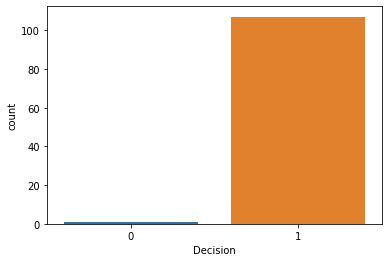

In [216]:
sns.countplot(x='Decision',data=data,label='count')
plt.show()

In [217]:
X = data.drop(labels=['Decision', 'High School GPA', 'SAT Score', 'Federal Ethnic Group', 'Pell Grant Eligible? (1=yes, 0=no)', 'Athlete? (1=yes, 0=no)','F17 GPA', 'S18 GPA', 'CUM GPA', 'Number of Credits Earned', 'Completed Connect? (1=yes, 0=no)'],axis=1)
y = data['Decision']

Splitting the Data into Train Test Split

In [218]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Training the Logistic Regression Model

In [219]:
model = LogisticRegression()

In [220]:
model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Intercept and Model Coefficients

In [221]:
model.intercept_

array([0.0161627])

In [222]:
model.coef_

array([[ 0.19785238,  0.00115885, -0.04661178, -0.00083227, -0.05056687,
        -0.14914025,  0.06178387, -0.05392153, -0.22365691,  0.02411527,
         0.0590386 ,  0.0781889 ,  0.08107812,  0.06653404,  0.11535517,
         0.04593899,  0.04783539,  0.1243914 ,  0.46837489,  0.41074497,
         0.59425168,  0.00503764,  0.58081665]])

Testing the Model 

In [223]:
y_pred = model.predict(X_test)

Measuring the Performance of Logistic Regression Model

In [224]:
print("Logistic Model Accuracy : {:.2f}".format(model.score(X,y)))

Logistic Model Accuracy : 0.99


We have only taken into account the variables that are most closely related, which is the only reason we are getting such high accuracy. I am confident that the accuracy will significantly decrease if we take into account every variable that affects the dataset, and that model will then appear to be something we can rely on.

Classification report

In [225]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.98        22

    accuracy                           0.95        22
   macro avg       0.50      0.48      0.49        22
weighted avg       1.00      0.95      0.98        22



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision tells us the percentage of correct positive predictions relative to total positive predictions. Here weight avg value of precision 50%.

Recall tells us the Percentage of correct positive predictions relative to total actual positives. Here weight avg value of Recall is 48%.

F1 score is weighted harmonic mean of precision and recall. The closer to 1 the better the model. Our F1 score is 0.98

Confusion matrix for the accuracy of the model

In [226]:
confusionmatrix = confusion_matrix(y_test,y_pred)

In [227]:
print(confusionmatrix)

[[ 0  0]
 [ 1 21]]


True Negative value = 0

False Positive value = 0 (Type 1 Error)

False Negative value = 1 (Type 2 Error)

True Positive value = 21

Heat map of confusion matrix

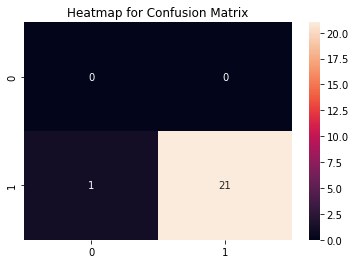

In [228]:
sns.heatmap(confusionmatrix, annot=True)
plt.title("Heatmap for Confusion Matrix")
plt.savefig("Heatmap_for_confusion_matrix")
plt.show();

testing the error of the model obtained

In [229]:
testError = (1 + 0)/(0+0+1+21)
print("The Test Error of the Model Obtained is : {:.2f} %".format(testError * 100))

The Test Error of the Model Obtained is : 4.55 %
